In [23]:
print('ESte el CSV Madrid')
print("Hola, soy Malala, y estos son mis deberes")

ESte el CSV Madrid
Hola, soy Malala, y estos son mis deberes


In [24]:

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from ydata_profiling import ProfileReport
from sklearn.linear_model import LinearRegression

Leer csv

In [25]:
df = pd.read_csv('../../Data/FuentesOriginales/MADRID/MADRID_UTF8_CLEAN.csv')
df.head(11)

,municipio_codigo,municipio_nombre,distrito_codigo,distrito_nombre,barrio_codigo,barrio_nombre,sexo,nacionalidad,poblacion_empadronada
0,79,Madrid,79601,Centro,796011,Palacio,Hombre,Africa,163
1,79,Madrid,79601,Centro,796011,Palacio,Hombre,América Central y del Caribe,83
2,79,Madrid,79601,Centro,796011,Palacio,Hombre,América del Norte,169
3,79,Madrid,79601,Centro,796011,Palacio,Hombre,América del Sur,384
4,79,Madrid,79601,Centro,796011,Palacio,Hombre,Apátridas,1
5,79,Madrid,79601,Centro,796011,Palacio,Hombre,Asia,251
6,79,Madrid,79601,Centro,796011,Palacio,Hombre,Oceanía,9
7,79,Madrid,79601,Centro,796011,Palacio,Hombre,Otros países de América,0
8,79,Madrid,79601,Centro,796011,Palacio,Hombre,Resto de Europa,47
9,79,Madrid,79601,Centro,796011,Palacio,Hombre,Unión Europea,9714


Consultar las columnas

In [26]:
df.columns

Index(['municipio_codigo', 'municipio_nombre', 'distrito_codigo',
       'distrito_nombre', 'barrio_codigo', 'barrio_nombre', 'sexo',
       'nacionalidad', 'poblacion_empadronada'],
      dtype='object')

Ver información de cada columna

In [27]:
# Info columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2560 entries, 0 to 2559
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   municipio_codigo       2560 non-null   int64 
 1   municipio_nombre       2560 non-null   object
 2   distrito_codigo        2560 non-null   int64 
 3   distrito_nombre        2560 non-null   object
 4   barrio_codigo          2560 non-null   int64 
 5   barrio_nombre          2560 non-null   object
 6   sexo                   2560 non-null   object
 7   nacionalidad           2560 non-null   object
 8   poblacion_empadronada  2560 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 180.1+ KB


In [28]:
#consultar los nulos
df.isnull().sum()

municipio_codigo         0
municipio_nombre         0
distrito_codigo          0
distrito_nombre          0
barrio_codigo            0
barrio_nombre            0
sexo                     0
nacionalidad             0
poblacion_empadronada    0
dtype: int64

In [29]:
# Descripción
df.describe()

,municipio_codigo,distrito_codigo,barrio_codigo,poblacion_empadronada
count,2560.0,2560.000000,2560.000000,2560.000000
mean,79.0,79610.507812,796108.843750,1243.351953
std,0.0,5.807914,58.087325,3952.810627
min,79.0,79601.000000,796011.000000,0.000000
25%,79.0,79606.000000,796061.750000,1.000000
50%,79.0,79610.000000,796106.500000,45.000000
75%,79.0,79615.000000,796155.250000,217.000000
max,79.0,79621.000000,796215.000000,38082.000000


mostrar con matplotlib las figuras de Inmigración total en Madrid y España

<BarContainer object of 2 artists>

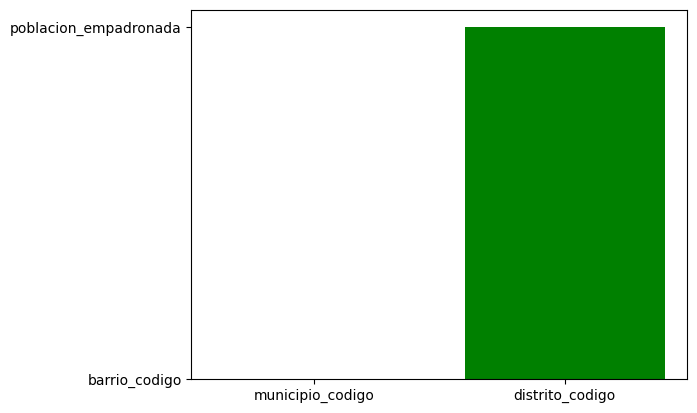

In [30]:
x = np.array(['municipio_codigo', 'distrito_codigo'])
y = np.array(['barrio_codigo', 'poblacion_empadronada'])

plt.bar(x, y, color = 'green')

In [31]:
profile = ProfileReport(df, title="Pandas profile Inmigración")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

TARTA

In [32]:
df.head(2)

,municipio_codigo,municipio_nombre,distrito_codigo,distrito_nombre,barrio_codigo,barrio_nombre,sexo,nacionalidad,poblacion_empadronada
0,79,Madrid,79601,Centro,796011,Palacio,Hombre,Africa,163
1,79,Madrid,79601,Centro,796011,Palacio,Hombre,América Central y del Caribe,83


In [33]:
df.describe()

,municipio_codigo,distrito_codigo,barrio_codigo,poblacion_empadronada
count,2560.0,2560.000000,2560.000000,2560.000000
mean,79.0,79610.507812,796108.843750,1243.351953
std,0.0,5.807914,58.087325,3952.810627
min,79.0,79601.000000,796011.000000,0.000000
25%,79.0,79606.000000,796061.750000,1.000000
50%,79.0,79610.000000,796106.500000,45.000000
75%,79.0,79615.000000,796155.250000,217.000000
max,79.0,79621.000000,796215.000000,38082.000000


Text(0.5, 1.0, 'El porcentaje de la población empadronada')

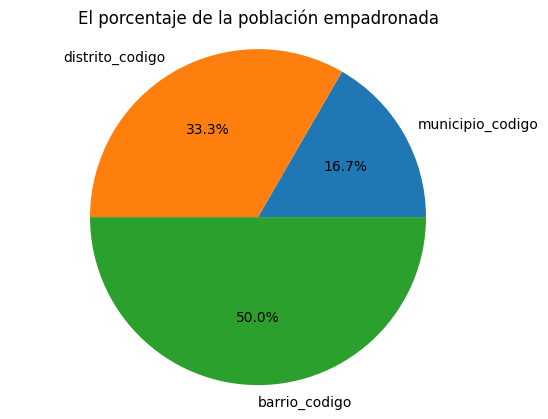

In [34]:
data = np.array([25, 50, 75])
nombre_label = ['municipio_codigo', 'distrito_codigo', 'barrio_codigo']
colors = ['Green', 'Red', 'Yellow']

plt.pie(data, labels=nombre_label, autopct='%.1f%%')
plt.axis('equal')
plt.title('El porcentaje de la población empadronada')

In [35]:
import pandas as pd
df = df.describe()
población_total = df['poblacion_empadronada'].sum()

df['porcentaje'] = (df['poblacion_empadronada'] / población_total) * 100
print(df)

       municipio_codigo  distrito_codigo  barrio_codigo  \
count            2560.0      2560.000000    2560.000000   
mean               79.0     79610.507812  796108.843750   
std                 0.0         5.807914      58.087325   
min                79.0     79601.000000  796011.000000   
25%                79.0     79606.000000  796061.750000   
50%                79.0     79610.000000  796106.500000   
75%                79.0     79615.000000  796155.250000   
max                79.0     79621.000000  796215.000000   

       poblacion_empadronada  porcentaje  
count            2560.000000    5.553005  
mean             1243.351953    2.697008  
std              3952.810627    8.574210  
min                 0.000000    0.000000  
25%                 1.000000    0.002169  
50%                45.000000    0.097611  
75%               217.000000    0.470704  
max             38082.000000   82.605292  


Text(0.5, 1.0, 'El porcentaje de la población empadronada')

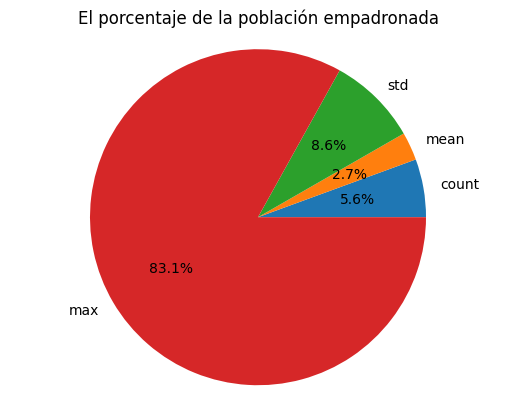

In [36]:
data = np.array([2560.000, 1243.351, 3952.810, 38082.000])
nombre_label = ['count', 'mean', 'std', 'max']
colors = ['Green', 'Grey', 'Orange', 'Pink', '']

plt.pie(data, labels=nombre_label, autopct='%.1f%%')
plt.axis('equal')
plt.title('El porcentaje de la población empadronada')

DISPLOT

In [37]:
sns.__version__

'0.12.2'

In [38]:
df.head(1)

,municipio_codigo,distrito_codigo,barrio_codigo,poblacion_empadronada,porcentaje
count,2560.0,2560.0,2560.0,2560.0,5.553005


In [39]:
df.sort_values('municipio_codigo', ascending=False)

,municipio_codigo,distrito_codigo,barrio_codigo,poblacion_empadronada,porcentaje
count,2560.0,2560.000000,2560.000000,2560.000000,5.553005
mean,79.0,79610.507812,796108.843750,1243.351953,2.697008
min,79.0,79601.000000,796011.000000,0.000000,0.000000
25%,79.0,79606.000000,796061.750000,1.000000,0.002169
50%,79.0,79610.000000,796106.500000,45.000000,0.097611
75%,79.0,79615.000000,796155.250000,217.000000,0.470704
max,79.0,79621.000000,796215.000000,38082.000000,82.605292
std,0.0,5.807914,58.087325,3952.810627,8.574210


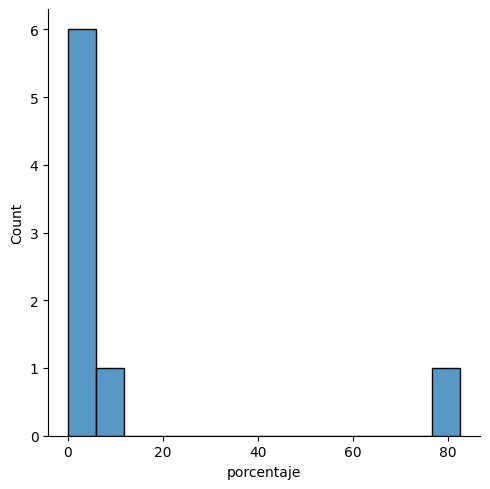

In [40]:
sns.displot(df['porcentaje'])

In [41]:
df.shape

(8, 5)

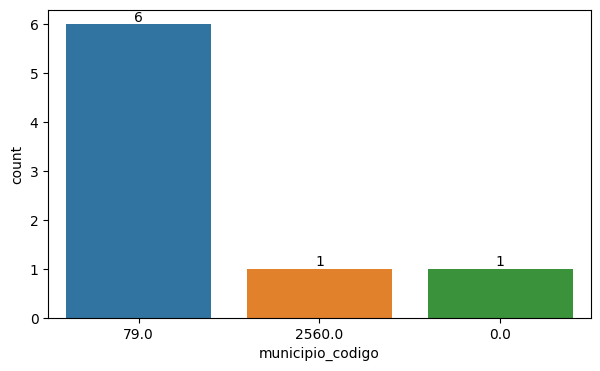

In [42]:
plt.figure(figsize=(7,4))
order = df['municipio_codigo'].value_counts(ascending=False).index
ax = sns.countplot(data=df, x='municipio_codigo', order=order)
ax.bar_label(ax.containers[0]);

<Axes: xlabel='municipio_codigo', ylabel='barrio_codigo'>

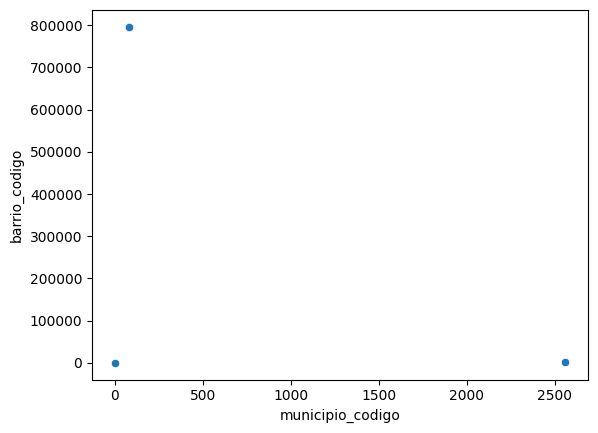

In [43]:
sns.scatterplot(data=df, x='municipio_codigo', y='barrio_codigo')

Text(0.5, 1.0, 'Código de municipio por barrio')

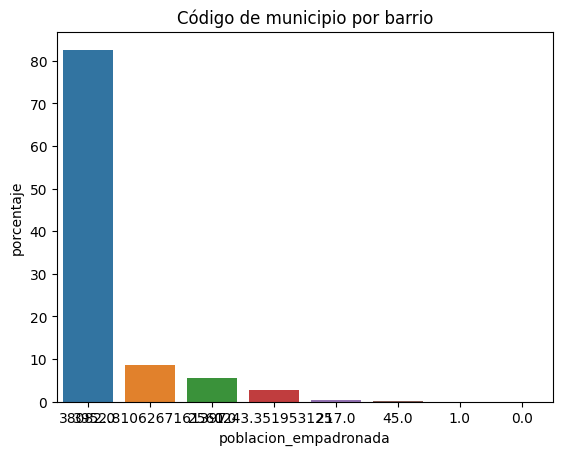

In [44]:
df_codigo = df.groupby('poblacion_empadronada')['porcentaje'].median().reset_index().sort_values('porcentaje', ascending=False)
sns.barplot(data=df_codigo, x='poblacion_empadronada', y='porcentaje', errorbar=None, order=df_codigo['poblacion_empadronada'])
plt.title("Código de municipio por barrio")